In [42]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from random import random

# Mapping of state to a number
word_map = {"firing": 0, "ready": 1, "resting": 2}

# Size of grid
N = 40

In [43]:
# Function that initiliazes the brain (grid) with 30 % firing states and rest ready states
def initializeBrain(N: int):
    brain =[["" for i in range(N)] for j in range(N)]
    for i in range(N):
        for j in range(N):
            if random() <= .3:
                brain[i][j] = word_map["firing"]
            else:
                brain[i][j] = word_map["ready"]
    return brain


In [44]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mPatches

cmap = ListedColormap(["red", "green", "white"])
ready_patch = mPatches.Patch(color="green", label="Ready")
firing_patch = mPatches.Patch(color="red", label="Firing")
resting_patch = mPatches.Patch(color="white", label="Resting")

# Function that displays the grid using imshow
def showBrain(world, title):
        plt.figure()
        plt.title(title)
        plt.legend(handles=[firing_patch, ready_patch, resting_patch],bbox_to_anchor=(1.05, 1), loc=2)
        plt.imshow(world,vmin=0, vmax=len(cmap.colors), cmap=cmap)
        plt.show()

In [45]:
import copy
debug = False

# Function that updates the brain at every time step
def updateWorld(world):

    nextTimeStepWorld = copy.deepcopy(world)
    for i in range(N):
        for j in range(N):

            # Rule (a)
            if (world[i][j] == word_map["ready"]):
                if debug:
                    print(f"i: {i}, j:{j}")
                numFiringClose = 0
                for k in range(-1, 2):
                    for h in range(-1, 2):
                        if (k == 0 and h == 0):
                            continue
                        checkRow = i + k if i + k < N else 0
                        checkColumn = j + h if j + h < N else 0
                        
                        if debug:
                            print(f"k: {k}, h:{h}")
                            print( f"state at index {world[checkRow][checkColumn]}")
                        if world[checkRow][checkColumn] == word_map["firing"]:
                            numFiringClose += 1
                if debug:
                    print(numFiringClose)
                if numFiringClose == 2:
                    if debug:
                        print("Firing next time step")
                    nextTimeStepWorld[i][j] =word_map["firing"]
                    
            # Rule (b)
            elif (world[i][j] == word_map["firing"]):
                if debug:
                    print("Resting next time step")
                nextTimeStepWorld[i][j] = word_map["resting"]

            # Rule (c)
            else:
                if debug:
                    print("ready next time step")
                nextTimeStepWorld[i][j] = word_map["ready"]
                
    return nextTimeStepWorld

                    
            

                



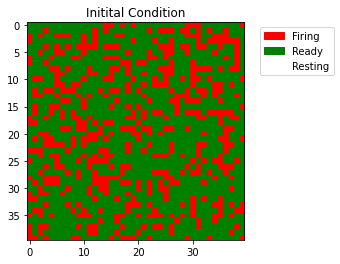

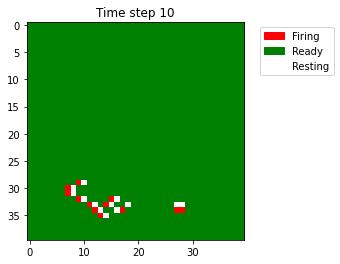

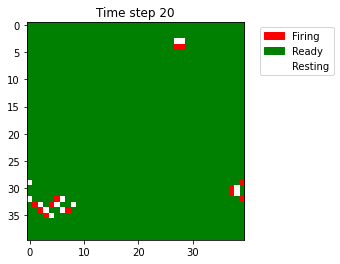

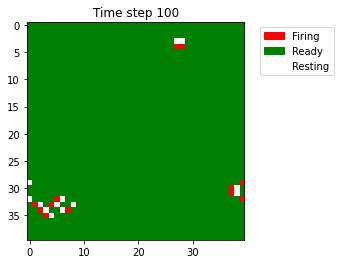

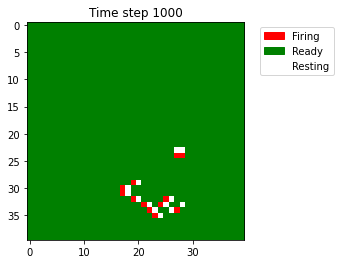

In [46]:

plotTimes = [10, 20, 100, 1000]
brain = initializeBrain(N)
showBrain(brain, "Initital Condition")

# Loop through 1000 time steps and update brain at each step and plot it at given time stamps
for i in range(plotTimes[-1]):
    world = updateWorld(world)
    if i + 1 in plotTimes:
        showBrain(world, f"Time step {i + 1}")
        

    



In [47]:
# Function that counts an occurence of a firing cell
def countFiringCells(brain):
    count = 0
    for row in brain:
        for value in row:
            if value == word_map["firing"]:
                count += 1
    return count



Text(0.5, 1.0, 'Average number of cells for each time step for 100 different initial conditions')

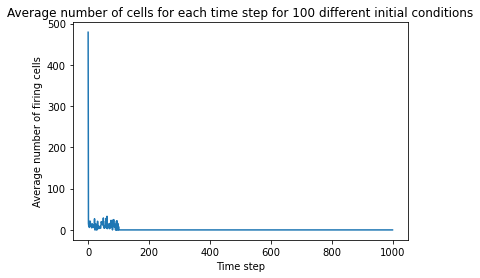

In [48]:

# Simulation of the model 100 times for different initial conditions and for 1000 time steps and plot the average number of firing cells over time.
meanNumberOfFiringCells = np.zeros((1001, 1))
firstOneDone = False
for i in range(100):
    brain2 = initializeBrain(N)
    if firstOneDone:
        meanNumberOfFiringCells[0] = np.mean(countFiringCells(brain2), meanNumberOfFiringCells[0])
    else:
        meanNumberOfFiringCells[0] = countFiringCells(brain2)
    
    for j in range(1000):

        brain2 = updateWorld(brain2)
        if firstOneDone:
            meanNumberOfFiringCells[i+1] = np.mean(countFiringCells(brain2), meanNumberOfFiringCells[i+1])
        else:
            meanNumberOfFiringCells[i+1] = countFiringCells(brain2)
        


t = np.arange(0, 1001)
plt.plot(t, meanNumberOfFiringCells)
plt.xlabel("Time step")
plt.ylabel("Average number of firing cells")
plt.title("Average number of cells for each time step for 100 different initial conditions")
        

In [49]:

from IPython.display import clear_output
from time import sleep
# Function that creates a "GIF" of the simulation to find interesting patterns
def createGIF(world):
    showBrain(world, "Initital Condition")
    plt.figure()
    for i in range(plotTimes[-1]):
        world = updateWorld(world)
        plt.title(f"Time step {i + 1}")
        plt.legend(handles=[firing_patch, ready_patch, resting_patch],bbox_to_anchor=(1.05, 1), loc=2)
        plt.imshow(world,vmin=0, vmax=len(cmap.colors), cmap=cmap)
        plt.show()
        sleep(0.1)
        clear_output(wait = True)
        


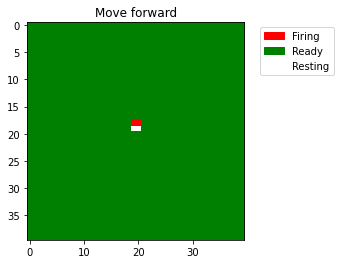

In [50]:
# Question 2:
# Move forward at a rate of one cell per time step, while preserving the same shape.
s = (40,40)
moveForward = np.ones(s)
moveForward[19,19] = 2
moveForward[19,20] = 2
moveForward[18,19] = 0
moveForward[18,20] = 0
showBrain(moveForward, "Move forward")

# GIF displaying it's movement
# createGIF(moveForward)

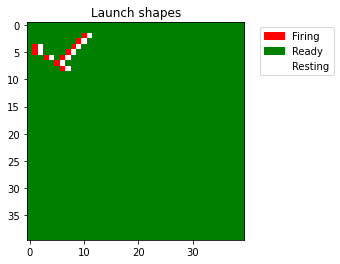

In [51]:
# Move forward at a rate of one cell per time step, launching other shapes behind them
s = (40,40)
launchShapes = np.ones(s)
# 4 Box
launchShapes[5,2] = 2
launchShapes[4,2] = 2
launchShapes[5,1] = 0
launchShapes[4,1] = 0


# 2 Box
launchShapes[6,4] = 2
launchShapes[6,3] = 0

# 2 Box
launchShapes[7,6] = 2
launchShapes[7,5] = 0

# 2 Box
launchShapes[6,7] = 2
launchShapes[6,6] = 0

# 2 Box
launchShapes[8,7] = 2
launchShapes[8,6] = 0

# 2 Box
launchShapes[5,8] = 2
launchShapes[5,7] = 0

# 2 Box
launchShapes[4,9] = 2
launchShapes[4,8] = 0

# 2 Box
launchShapes[3,10] = 2
launchShapes[3,9] = 0

# 2 Box
launchShapes[2,11] = 2
launchShapes[2,10] = 0

showBrain(launchShapes, "Launch shapes")
# GIF displaying it's movement
# createGIF(launchShapes)
